<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-31/GY1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install impedance -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 726.2 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit

In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1361, done.
remote: Counting objects: 100% (651/651), done.
remote: Compressing objects: 100% (329/329), done.
remote: Total 1361 (delta 423), reused 497 (delta 314), pack-reused 710
Receiving objects: 100% (1361/1361), 86.97 MiB | 10.26 MiB/s, done.
Resolving deltas: 100% (792/792), done.
Updating files: 100% (182/182), done.


'/content'

In [4]:
%cd "/content/gator/data/07-31/"

/content/gator/data/07-31


In [5]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [6]:
prep_csv('defbuffer1_0731_152436.csv')
df = pd.read_csv('defbuffer1_0731_152436.csv')


Fill Mode,1



In [7]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.002138,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,5.467200e-08,Amp DC,1.000000e-02,T,2W,F,F,0.000000
1,-0.006232,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,5.536760e-08,Amp DC,1.000000e-02,T,2W,F,F,0.069382
2,-0.013554,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,5.606310e-08,Amp DC,1.000000e-02,T,2W,F,F,0.138717
3,-0.657557,Volt DC,1.00,5.5,F,F,F,F,F,F,...,F,Main,4.284870e-08,Amp DC,1.000000e-02,T,2W,F,F,0.507132
4,-0.815253,Volt DC,1.00,5.5,F,F,F,F,F,F,...,F,Main,4.632620e-08,Amp DC,1.000000e-02,T,2W,F,F,0.576502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55675,0.347618,Volt DC,1.00,5.5,F,F,F,F,F,F,...,F,Main,1.000000e-09,Amp DC,1.000000e-08,T,2W,F,F,3920.908644
55676,0.347559,Volt DC,1.00,5.5,F,F,F,F,F,F,...,F,Main,1.000000e-09,Amp DC,1.000000e-08,T,2W,F,F,3920.977994
55677,0.347481,Volt DC,1.00,5.5,F,F,F,F,F,F,...,F,Main,1.000000e-09,Amp DC,1.000000e-08,T,2W,F,F,3921.047350
55678,0.347678,Volt DC,1.00,5.5,F,F,F,F,F,F,...,F,Main,1.000000e-09,Amp DC,1.000000e-08,T,2W,F,F,3921.116688


In [23]:
fig = px.scatter(df, x="Relative Time", y=["Reading"])
fig.show()


In [9]:
fig = px.scatter(df, x="Relative Time", y=["Value"])
fig.show()


In [10]:
T = df['Relative Time'].values
I = df['Value'].values
V = df['Reading'].values

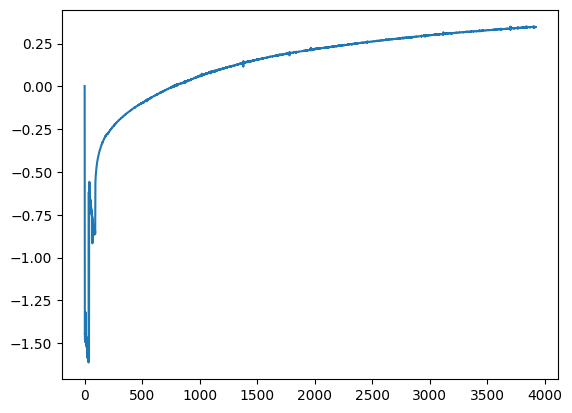

In [11]:
plt.plot(T,V)
#plt.xlim(5800,5980)
#plt.ylim(0.75e-6,1e-6)

# $R_{\text{ion}}C^\delta$

$$D^{\delta}=\frac{4L^2}{\pi  ^{2}(R_{\text{ion}}+R_{\text{eon}})C^{\delta} }<\frac{4L^2}{\pi  ^{2}(R_{\text{ion}})C^{\delta} }\sim 1\cdot 10^{-10} \mathrm{\frac{m^{2}}{s}}$$

(1000.0, 4000.0)

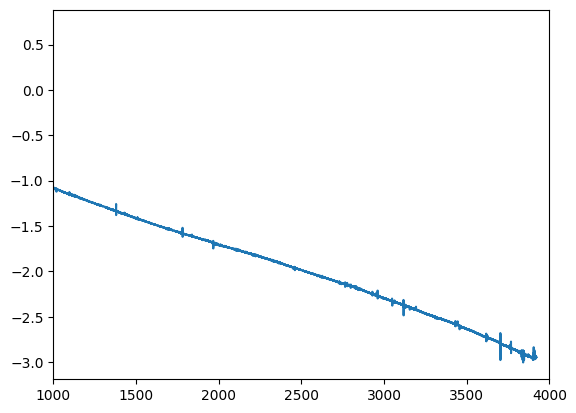

In [25]:
V2=V-0.4
plt.plot(T, np.log(-V2))
plt.xlim(1000,4000)
#plt.ylim(-4)

In [26]:
2/3000

0.0006666666666666666